# Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
# read data
df_pre = pd.read_csv('Processed_Post.csv')

# Data Processing/Wrangling

In [3]:
# modify data
df_pre1 = df_pre["Column"].str.split("\t", expand = True) #seperate one string column into multiple individual columns
new_header = df_pre1.iloc[0] #grab the first row for the header
df_pre1 = df_pre1[1:] 
df_pre1.columns = new_header #set the header row as the df header
df = df_pre1.drop([df_pre1.columns[0]], axis='columns') 

# preview first five rows of data
df.head()

,post_date,entity_id,followers,is_picture,is_video,video_duration_secs,impressions,likes,shares,replies,engagement_rate
1,2020-01-02 17:10:31,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NotApplicable,36023.36584878,123,3,42,0.000692903513185789
2,2020-01-02 17:46:20,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NotApplicable,23402.6832269543,4,0,0,1.64977026948997e-05
3,2020-01-02 20:28:16,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NotApplicable,26822.6463467185,19,1,0,8.24885134744987e-05
4,2020-01-02 20:49:44,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NotApplicable,23332.3884592917,1,0,1,8.24885134744987e-06
5,2020-08-25 01:46:07,4AAFEFB838974FDCA41932C4D32FD52A,2063682.0,False,False,NotApplicable,206167.651791252,66,2,1,3.34353839399675e-05


In [4]:
# total number of rows and columns
row, column = df.shape
print('Total # of rows: ', row, '\nTotal # of columns: ', column)

Total # of rows:  6182 
Total # of columns:  11


In [5]:
# check data types
df.dtypes

0
post_date              object
entity_id              object
followers              object
is_picture             object
is_video               object
video_duration_secs    object
impressions            object
likes                  object
shares                 object
replies                object
engagement_rate        object
dtype: object

In [6]:
# change data type
df[['followers', 'impressions', 'impressions', 'likes', 'shares', 'replies', 'engagement_rate']] = df[['followers', 'impressions', 'impressions', 'likes', 'shares', 'replies', 'engagement_rate']].apply(pd.to_numeric) 
df['post_date'] = df['post_date'].apply(pd.to_datetime)
df['is_picture'] = df['is_picture'].map(ast.literal_eval)
df['is_video'] = df['is_video'].map(ast.literal_eval)

df.dtypes

0
post_date              datetime64[ns]
entity_id                      object
followers                     float64
is_picture                       bool
is_video                         bool
video_duration_secs            object
impressions                   float64
likes                           int64
shares                          int64
replies                         int64
engagement_rate               float64
dtype: object

In [7]:
# check null values
df.isnull().sum()

0
post_date              0
entity_id              0
followers              1
is_picture             0
is_video               0
video_duration_secs    0
impressions            1
likes                  0
shares                 0
replies                0
engagement_rate        0
dtype: int64

In [8]:
# pickout the specific row with null values
df[df['followers'].isnull()]

,post_date,entity_id,followers,is_picture,is_video,video_duration_secs,impressions,likes,shares,replies,engagement_rate
2578,2020-08-08 02:41:47,4AAFEFB838974FDCA41932C4D32FD52A,NaN,False,False,NotApplicable,NaN,0,0,0,0.0


In [9]:
# drop missing values
df.dropna(axis=0, inplace=True)

In [10]:
# get dummy variables for 'is_picture' and 'is_video'
dummy_pic = pd.get_dummies(df['is_picture'])
dummy_pic.columns = ['dummy_pic_no', 'dummy_pic_yes']
dummy_vid = pd.get_dummies(df['is_video'])
dummy_vid.columns = ['dummy_vid_no', 'dummy_vid_yes']
df = pd.concat([df, dummy_pic, dummy_vid], axis=1)

df.head()

,post_date,entity_id,followers,is_picture,is_video,video_duration_secs,impressions,likes,shares,replies,engagement_rate,dummy_pic_no,dummy_pic_yes,dummy_vid_no,dummy_vid_yes
1,2020-01-02 17:10:31,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NotApplicable,36023.365849,123,3,42,0.000693,1,0,1,0
2,2020-01-02 17:46:20,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NotApplicable,23402.683227,4,0,0,0.000016,1,0,1,0
3,2020-01-02 20:28:16,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NotApplicable,26822.646347,19,1,0,0.000082,1,0,1,0
4,2020-01-02 20:49:44,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NotApplicable,23332.388459,1,0,1,0.000008,1,0,1,0
5,2020-08-25 01:46:07,4AAFEFB838974FDCA41932C4D32FD52A,2063682.0,False,False,NotApplicable,206167.651791,66,2,1,0.000033,1,0,1,0


In [11]:
# Get 'post_date' related features
df['month'] = df['post_date'].dt.month
df['day'] = df['post_date'].dt.day
df['hour'] = df['post_date'].dt.hour

df.head()

,post_date,entity_id,followers,is_picture,is_video,video_duration_secs,impressions,likes,shares,replies,engagement_rate,dummy_pic_no,dummy_pic_yes,dummy_vid_no,dummy_vid_yes,month,day,hour
1,2020-01-02 17:10:31,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NotApplicable,36023.365849,123,3,42,0.000693,1,0,1,0,1,2,17
2,2020-01-02 17:46:20,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NotApplicable,23402.683227,4,0,0,0.000016,1,0,1,0,1,2,17
3,2020-01-02 20:28:16,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NotApplicable,26822.646347,19,1,0,0.000082,1,0,1,0,1,2,20
4,2020-01-02 20:49:44,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NotApplicable,23332.388459,1,0,1,0.000008,1,0,1,0,1,2,20
5,2020-08-25 01:46:07,4AAFEFB838974FDCA41932C4D32FD52A,2063682.0,False,False,NotApplicable,206167.651791,66,2,1,0.000033,1,0,1,0,8,25,1


In [12]:
# replace 'NotApplicable' with 0 under 'video_duration_secs' column
df['video_duration_secs'] = df['video_duration_secs'].replace(['NotApplicable'], 0)
df['video_duration_secs'] = df['video_duration_secs'].apply(pd.to_numeric)

# Exploratory Data Analysis

In [13]:
# Select just the numeric columns and create a new dataframe
df_new = df.select_dtypes(include=np.number)
df_new.head()

,followers,video_duration_secs,impressions,likes,shares,replies,engagement_rate,dummy_pic_no,dummy_pic_yes,dummy_vid_no,dummy_vid_yes,month,day,hour
1,242458.0,0.0,36023.365849,123,3,42,0.000693,1,0,1,0,1,2,17
2,242458.0,0.0,23402.683227,4,0,0,0.000016,1,0,1,0,1,2,17
3,242458.0,0.0,26822.646347,19,1,0,0.000082,1,0,1,0,1,2,20
4,242458.0,0.0,23332.388459,1,0,1,0.000008,1,0,1,0,1,2,20
5,2063682.0,0.0,206167.651791,66,2,1,0.000033,1,0,1,0,8,25,1


In [14]:
df_new.isnull().sum()

followers              0
video_duration_secs    0
impressions            0
likes                  0
shares                 0
replies                0
engagement_rate        0
dummy_pic_no           0
dummy_pic_yes          0
dummy_vid_no           0
dummy_vid_yes          0
month                  0
day                    0
hour                   0
dtype: int64

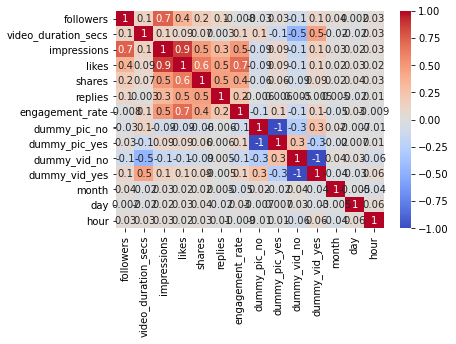

In [15]:
# show correlation
sns.heatmap(df_new.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

# Model Development

In [16]:
# define the predictor and target variable
x = df_new[df_new.columns.difference(['impressions'])]
y = df_new[['impressions']]

# split the train and test dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [17]:
# multiple linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # create a linear regression object using the constructor
lm.fit(x_train, y_train)
y_hat_lm = lm.predict(x_test)

In [18]:
# evaluate MLR model
lm.score(x_test, y_test) # 91.65% of variation of the target variable 'impression' that is explained by MLR

0.9165044405206539

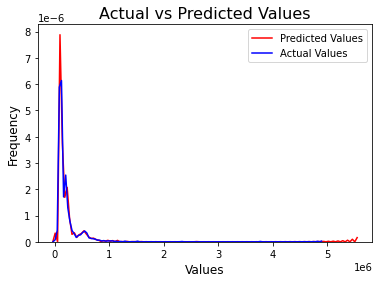

In [19]:
# distribution plot
sns.distplot(y_hat_lm, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.savefig('ap.png')

In [20]:
# ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 

y_hat_rr = rr.predict(x_test) 
r2_score(y_test, y_hat_rr) # 91.53% of variation of the target variable 'impression' that is explained by MLR

/Users/Cecilia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.93322e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.9153491755198633

In [21]:
# lasso regression
from sklearn.linear_model import Lasso
lr = Lasso(alpha=0.01)
lr.fit(x_train, y_train) 

y_hat_lr = lr.predict(x_test) 
r2_score(y_test, y_hat_lr) # 91.65% of variation of the target variable 'impression' that is explained by MLR

0.916489165377095